# Preparation

In [180]:
# load required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [181]:
%matplotlib inline

In [182]:
# load iris dataset
from sklearn.datasets import load_iris

data = load_iris()


# Wrangling

Practising some commands to get some information how the data looks

In [183]:
#data
#data.feature_names
#data.target_names
#data.target
#data.data
#type(data)
#type(data.data)

This dataset has all kinds of unnecessary crap in it. Let's create a dataframe with only things we need.

First, check feature names and their order so that we can name columsn correctly in the dataframe.

In [184]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [185]:
data.data[0]

array([ 5.1,  3.5,  1.4,  0.2])

In [186]:
df = pd.DataFrame(data = data.data, columns = ["sepallength", "sepalwidth", "petallength", "petalwidth"])
df["species"] = data.target

In [187]:
df.head()

,sepallength,sepalwidth,petallength,petalwidth,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Looks good, but for now, I want to see actual names in species columns. Let's see what the names are, what numbers they correspond to and finally let's map the names in the dataframe.

In [188]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [189]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [190]:
df["species"] = df["species"].map( {
    0 : "setosa",
    1 : "versicolor",
    2 : "virginica"
})

In [191]:
df.head()

,sepallength,sepalwidth,petallength,petalwidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


We can work with this

# Visualization

On a side note: more of these visualizations could be drawn, but I'm just practising these commands and not looking anything specific at the moment.

Draw a simple scatter plot to see if we can detect any clusters.

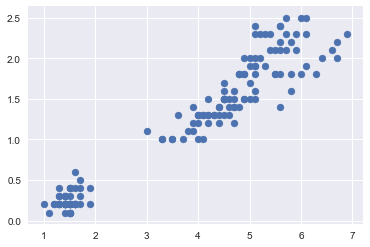

In [192]:
sca = plt.scatter(df.petallength, df.petalwidth)

Matplot's scatter plot is handy, but seaborn expands its functionality greatly.

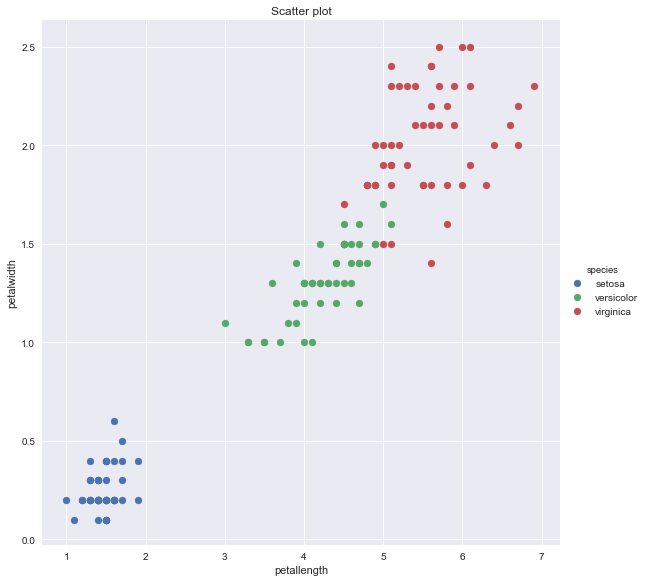

In [193]:
#fig = sns.FacetGrid(df, hue = "species", size = 8, row = "species", legend_out = False)
g = sns.FacetGrid(df, hue = "species", size = 8)
g.map(plt.scatter, "petallength", "petalwidth")
g.add_legend()
g.set(title = "Scatter plot")

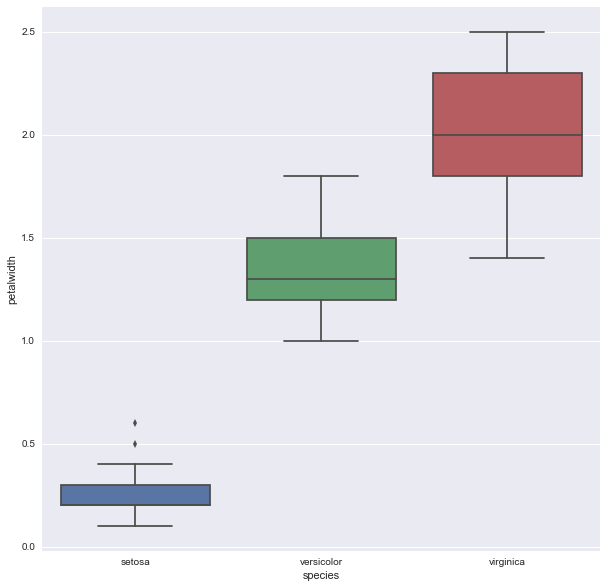

In [194]:
fig, ax = plt.subplots(1, 1, figsize = (10, 10))

g = sns.boxplot("species", "petalwidth", data = df, ax = ax)

# pandas can do this too
#df.boxplot(column = "petalwidth", by = "species", ax = ax)

Setosa seems to have a couple of outliers. We could remove them, but for now let's just let them be.

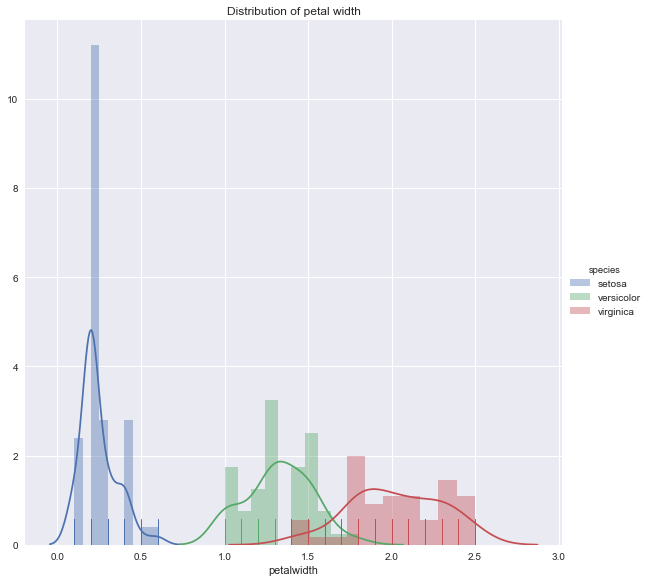

In [195]:
g = sns.FacetGrid(df, hue = "species", size = 8)

g.map(sns.distplot, "petalwidth", bins = 10, kde = True, rug = True)
g.add_legend()
g.set(title = "Distribution of petal width")

# Time to analyze

## Split data into training and testing

In [196]:
from sklearn.cross_validation import train_test_split

# create train dataframe of all but species column of df
train = df.drop("species", axis = 1)

# create test dataframe which is only the species column of df
test = df["species"]

# split data
xtrain, xtest, ytrain, ytest = train_test_split(train, test, train_size = .75)

In [197]:
# let's see the shape of these matrices and vectors
print("Training data: ", xtrain.shape)
print("Testing data: ", xtest.shape)
print("Training labels: ", ytrain.shape)
print("Testing labels: ", ytest.shape)


Training data:  (112, 4)
Testing data:  (38, 4)
Training labels:  (112,)
Testing labels:  (38,)


# K-Nearest Neighbor

In [198]:
# import KNN model
from sklearn.neighbors import KNeighborsClassifier

In [199]:
# instantiate KNN model
knn = KNeighborsClassifier()

In [200]:
# train the model with training data and labels
knn.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [201]:
# use model to predict results for testing dataset
y_pred = knn.predict(xtest)
print(prediction)

['setosa' 'virginica' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica'
 'versicolor' 'virginica' 'setosa' 'versicolor' 'setosa' 'setosa'
 'virginica' 'setosa' 'setosa' 'setosa' 'versicolor' 'setosa' 'versicolor'
 'setosa' 'versicolor' 'versicolor' 'virginica' 'versicolor' 'versicolor'
 'setosa' 'virginica' 'virginica' 'setosa' 'virginica' 'virginica' 'setosa']


# Analyze performance

In [202]:
from sklearn.metrics import accuracy_score

In [203]:
# compare known labels of testing data to predicted labels, round the results and multiple to get percentage
print("KNN accuracy score is", accuracy_score(ytest, y_pred).round(2)*100, "percent.")

KNN accuracy score is 97.0 percent.


Performance has some variance in it. If we split dataset and train the model again, we might get slightly different result.

# Model tuning

In [208]:
# let's try different value for K
knn_tuned = KNeighborsClassifier(n_neighbors=16)

In [209]:
knn_tuned.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=16, p=2,
           weights='uniform')

In [210]:
prediction_tuned = knn_tuned.predict(xtest)

In [211]:
print("Tuned KNN accuracy score is: ", accuracy_score(ytest, prediction_tuned))

Tuned KNN accuracy score is:  0.973684210526
